In [2]:
import os
from nilearn import image as nimg
from nilearn import plotting as nplot
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import bids
import pandas as pd

In [3]:
fmriprep_dir ='/Users/wang/Desktop/Research_projects/BBSC/Functional/fMRI_Prep'
os.chdir(fmriprep_dir)

In [4]:
layout = bids.BIDSLayout(fmriprep_dir,validate=False,
                        config=['bids','derivatives'])

In [5]:
sub_list = layout.get_subjects()
sub_list.sort()

In [6]:
sub_list

['01', '02', '03']

In [13]:
func_files = layout.get(subject=sub_list[1-1],
                        datatype='func', task='rest',
                        desc='preproc',
                        space='MNI152NLin6Asym',
                        extension='nii.gz',
                       return_type='file')

In [15]:
mask_files = layout.get(subject=sub_list[1-1],
                        datatype='func', task='rest',
                        desc='brain',
                        suffix='mask',
                        space='MNI152NLin6Asym',
                        extension="nii.gz",
                       return_type='file')

In [17]:
confound_files = layout.get(subject=sub_list[1-1],
                            datatype='func', task='rest',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

In [28]:
func_file = func_files[1-1]
mask_file = mask_files[1-1]
confound_file = confound_files[1-1]

In [29]:
confound_vars = ['trans_x','trans_y','trans_z',
                        'rot_x','rot_y','rot_z',
                        'global_signal',
                        'csf', 'white_matter']


derivative_columns = ['{}_derivative1'.format(c) for c
                            in confound_vars]

In [30]:
final_confounds = confound_vars + derivative_columns
confound_df = confound_df[final_confounds]

In [31]:
raw_func_img = nimg.load_img(func_file)
raw_func_img.shape

(91, 109, 91, 350)

In [61]:
data2plot = raw_func_img.slicer[59:60,45:46,30:31,:].get_data()
data2plot = data2plot.flatten()
data2plot.shape

/tmp/ipykernel_56524/2230594395.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data2plot = raw_func_img.slicer[59:60,45:46,30:31,:].get_data()


(350,)

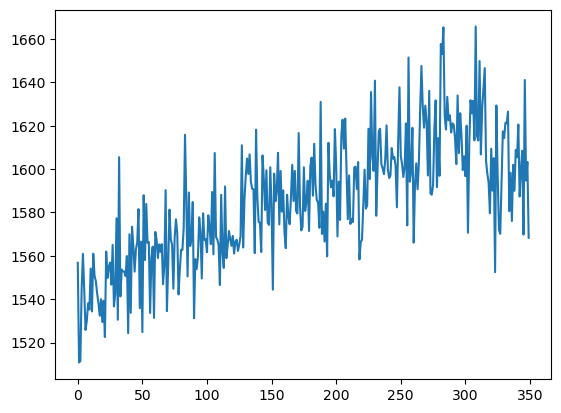

In [62]:
plt.plot(data2plot)

In [32]:
func_img = raw_func_img.slicer[:,:,:,4:]
func_img.shape

(91, 109, 91, 346)

In [33]:
drop_confound_df = confound_df.loc[4:]
confounds_matrix = drop_confound_df.values
confounds_matrix.shape

(346, 18)

In [34]:
high_pass= 0.009
low_pass = 0.08
t_r = 2

In [35]:
clean_img = nimg.clean_img(func_img,confounds=confounds_matrix,detrend=True,standardize=True,
                         low_pass=low_pass,high_pass=high_pass,t_r=t_r, mask_img=mask_file)

In [85]:
subi=1
sesi=1
clean_img.to_filename('./sub-%s/ses-%s/func/sub-%s_ses-%s_task-rest_\
space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz'\
      % (str(subi).zfill(2),str(sesi).zfill(2),str(subi),str(sesi)))

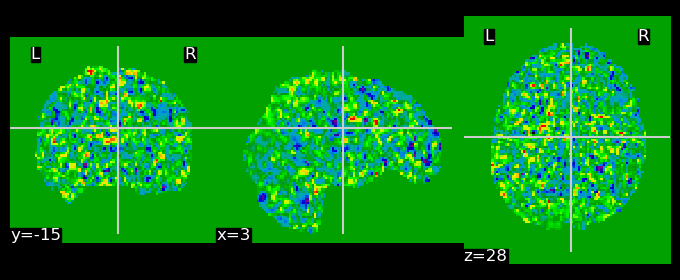

In [36]:
nplot.plot_epi(clean_img.slicer[:,:,:,50])

In [63]:
data2plot = clean_img.slicer[59:60,45:46,30:31,:].get_data()
data2plot = data2plot.flatten()
data2plot.shape

/tmp/ipykernel_56524/3164662191.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data2plot = clean_img.slicer[59:60,45:46,30:31,:].get_data()


(346,)

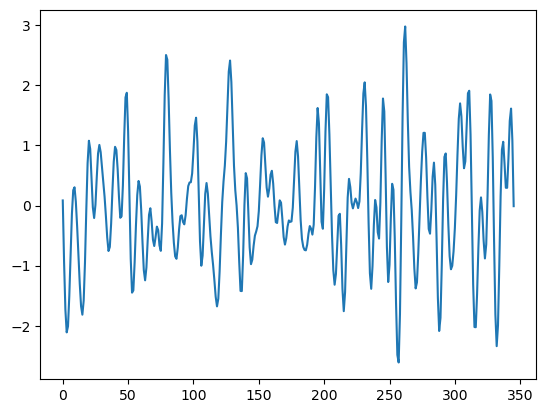

In [64]:
plt.plot(data2plot)